## IMPORTING LIBRARIES

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## READING DATASET

In [17]:
df = pd.read_csv(r"C:\Users\saksh\Downloads\archive (3)\customer_segmentation_data.csv")

In [19]:
df

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


In [21]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.50000,288.819436,1.0,250.7500,500.500,750.25,1000.00
age,1000.0,43.78300,15.042213,18.0,30.0000,45.000,57.00,69.00
income,1000.0,88500.80000,34230.771122,30004.0,57911.7500,87845.500,116110.25,149973.00
spending_score,1000.0,50.68500,28.955175,1.0,26.0000,50.000,76.00,100.00
membership_years,1000.0,5.46900,2.855730,1.0,3.0000,5.000,8.00,10.00
purchase_frequency,1000.0,26.59600,14.243654,1.0,15.0000,27.000,39.00,50.00
last_purchase_amount,1000.0,492.34867,295.744253,10.4,218.7625,491.595,747.17,999.74


## RFM CALCULATION

In [26]:
current_year = 2024

#calculating recency
df['Recency'] = current_year - df['membership_years']

# Use purchase_frequency directly for Frequency
df['Frequency'] = df['purchase_frequency']

# Calculating Monetary value
df['Monetary'] = df['last_purchase_amount'] * df['purchase_frequency']

rfm_data = df[['Recency','Frequency','Monetary']]

In [28]:
rfm_data.head()

,Recency,Frequency,Monetary
0,2021,24,2724.72
1,2022,42,1761.06
2,2022,28,11882.08
3,2015,5,4959.65
4,2021,25,8677.00


##  RFM SCORING

In [35]:
# Defining quantiles for scoring
quantiles = rfm_data[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.2, 0.4, 0.6, 0.8]).to_dict()

# Function to assign scores based on quantiles
def r_score(x):
    if x <= quantiles['Recency'][0.2]:
        return 5
    elif x <= quantiles['Recency'][0.4]:
        return 4
    elif x <= quantiles['Recency'][0.6]:
        return 3
    elif x <= quantiles['Recency'][0.8]:
        return 2
    else:
        return 1

def fm_score(x, col):
    if x <= quantiles[col][0.2]:
        return 1
    elif x <= quantiles[col][0.4]:
        return 2
    elif x <= quantiles[col][0.6]:
        return 3
    elif x <= quantiles[col][0.8]:
        return 4
    else:
        return 5

# Assigning scores
rfm_data['R_Score'] = rfm_data['Recency'].apply(r_score)
rfm_data['F_Score'] = rfm_data['Frequency'].apply(fm_score, col='Frequency')
rfm_data['M_Score'] = rfm_data['Monetary'].apply(fm_score, col='Monetary')

# Creating RFM segment
rfm_data['RFM_Segment'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

# Displaying the first few rows of the scored RFM dataset
rfm_data.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment
0,2021,24,2724.72,2,3,1,231
1,2022,42,1761.06,2,5,1,251
2,2022,28,11882.08,2,3,3,233
3,2015,5,4959.65,5,1,2,512
4,2021,25,8677.00,2,3,3,233


## RFM Segmentation

In [40]:
# Defining RFM score conditions
conditions = [
    (rfm_data['R_Score'] == 1) & (rfm_data['F_Score'] == 1) & (rfm_data['M_Score'] == 1),
    (rfm_data['R_Score'].isin([1, 2])) & (rfm_data['F_Score'].isin([1, 2])) & (rfm_data['M_Score'].isin([1, 2])),
    (rfm_data['R_Score'].isin([3, 4])) & (rfm_data['F_Score'].isin([2, 3])) & (rfm_data['M_Score'].isin([1, 2])),
    (rfm_data['R_Score'].isin([3, 4])) & (rfm_data['F_Score'].isin([3, 4])) & (rfm_data['M_Score'].isin([3, 4]))
]
# Defining segment names
segment_names = ['Champions', 'Loyal Customers', 'At Risk', 'Need Attention']

# Creating a new column for customer segments
df['Segment'] = np.select(conditions, segment_names, default='Other')

# Displaying the dataframe with the new segment column
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Recency,Frequency,Monetary,Segment
0,1,38,Female,99342,90,3,24,Groceries,113.53,2021,24,2724.72,Other
1,2,21,Female,78852,60,2,42,Sports,41.93,2022,42,1761.06,Other
2,3,60,Female,126573,30,2,28,Clothing,424.36,2022,28,11882.08,Other
3,4,40,Other,47099,74,9,5,Home & Garden,991.93,2015,5,4959.65,Other
4,5,65,Female,140621,21,3,25,Electronics,347.08,2021,25,8677.00,Other


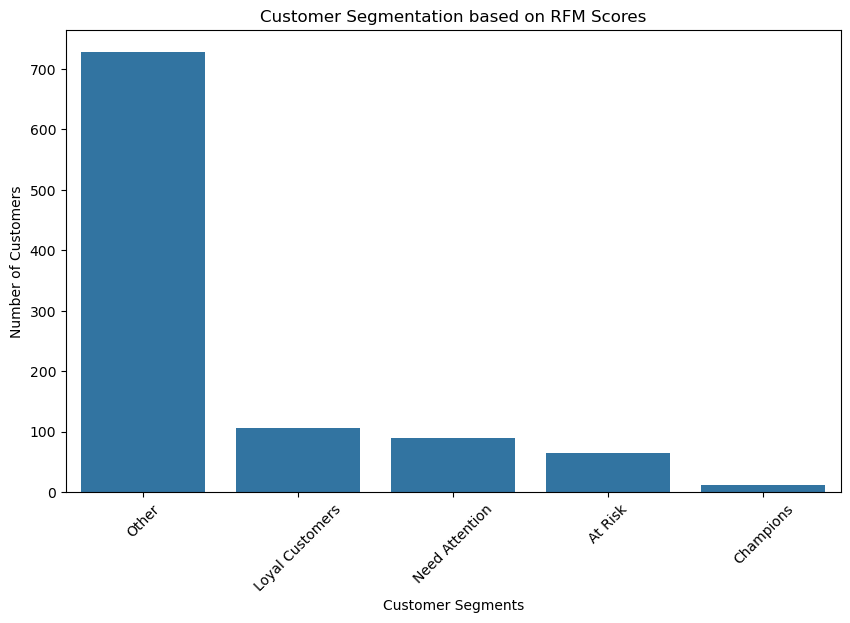

In [59]:
# Plotting the segmentation

# Counting the number of customers in each segment
segment_counts = df['Segment'].value_counts()

# Plotting the segments
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.xlabel('Customer Segments')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation based on RFM Scores')
plt.xticks(rotation=45)
plt.show()

## Recommendations

### (1) Champions
a). Characteristics: These customers have the highest RFM scores. They are your best customers, purchasing most frequently, spending the most, and recently.
b). Recommendations:
    - Exclusive Offers: Provide exclusive discounts or early access to new products.
    - Loyalty Programs: Offer special loyalty rewards or VIP programs to make them feel valued.
    - Personalized Communication: Send personalized thank-you notes and tailor marketing messages to their preferences.

### (2) Loyal Customers
a). Characteristics: These customers have high RFM scores but might not be as frequent or recent as champions.
b). Recommendations:
    - Upsell/Cross-sell: Suggest complementary products or services to increase average order value.
    - Regular Engagement: Keep them engaged with regular updates, newsletters, and personalized recommendations.
    - Loyalty Benefits: Offer loyalty points, discounts on future purchases, or refer-a-friend incentives.

### (3) At Risk
a). Characteristics: These customers had high purchase frequency and monetary value but have not purchased recently.
b). Recommendations:
    - Re-engagement Campaigns: Send re-engagement emails with special offers or reminders of what they liked about your products.
    - Surveys and Feedback: Ask for feedback to understand why they haven't purchased recently and address any concerns.
    - Personalized Offers: Provide personalized offers or discounts to incentivize them to return.

### (4) Need Attention
a). Characteristics: These customers have a moderate frequency and monetary value but are starting to drift away.
b). Recommendations:
    - Promotional Offers: Send special promotions or limited-time discounts to encourage repeat purchases.
    - Engagement Initiatives: Engage them with personalized content, product recommendations, or loyalty incentives.
    - Customer Service: Ensure excellent customer service to address any potential issues that might have caused them to drift away.


### (5) Other
a). Characteristics: These customers have lower RFM scores and may not be very engaged.
b). Recommendations:
    - Awareness Campaigns: Increase brand awareness through targeted marketing campaigns and social media engagement.
    - Incentives for First-Time Buyers: Offer discounts or deals for first-time purchases to encourage initial engagement.
    - Value Proposition: Highlight the unique value and benefits of your products to attract their attention.
